<a href="https://www.kaggle.com/mohammedshammeer/heart-failure-analysis?scriptVersionId=88443571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Heart Faliure Analysis - Based on Age**

## **Introduction**
Notebook representing how heart failure are major biased by age. considering every data is useful as it is, different types of analysis has been made through this notebook including, What type of pain does youngsters attain in case of having CVDs?, How does RestingECG variate among age?

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

<div class="alert alert-block alert-warning">
<b>Note:</b> Enter into distraction free mode to get a much greater experience. Minimize all side panels to view the visualizations much more properly.
</div>

## **Attribute Information**
<ul style="list-style-type:square;">
    <li><strong>Age :</strong> Age of the patient </li>
    <li><strong>Sex :</strong> Sex of the patient </li>
    <li><strong>ChestPainType :</strong> Resting blood pressure </li>
    <li><strong>Cholesterol :</strong> Serum cholesterol </li>
    <li><strong>FastingBS :</strong> Fasting blood sugar </li>
    <li><strong>RestingECG :</strong> Resting electrocardiogram results </li>
    <li><strong>MaxHR :</strong> Maximum heart rate achieved </li>
    <li><strong>ExerciseAngina :</strong> Exercise-induced angina </li>
    <li><strong>Oldpeak :</strong> Oldpeak = ST, depression value </li>
    <li><strong>ST_Slope :</strong> The slope of the peak exercise ST segment </li>
    <li><strong>HeartDisease :</strong> Output class </li>
</ul>

After knowing the details of data, we are moving to the actual story. Some major parameters decides the patient having a heart problem are BP range, Cholestrol, Resting ECG.

<hr>

### **Blood Pressure**
Blood Pressure Range (BP Range) is like some of the important parameter for someone getting an heart failure. But, It is not always the same case. How about we find more on some cool visualizations. Some people may seem like having a normal BP Range. Yes, It's not the only one to get heart failure.

The sectionized view of healthy and diseased(Diagonised for heart problem) people are provided down here with an density plot to know which age group is having lots of patients.

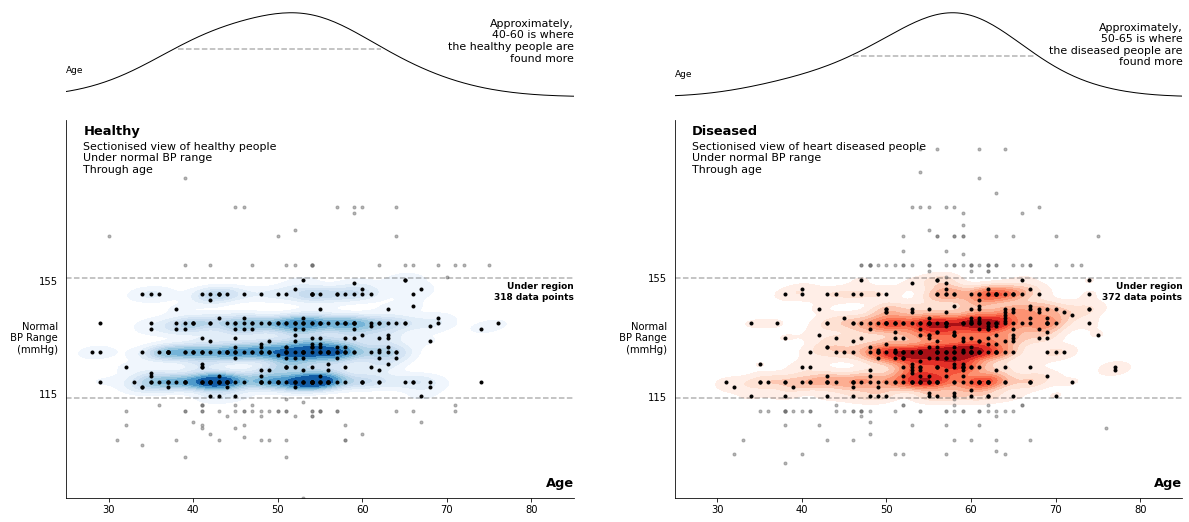

In [1]:
#Major libraries
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

# Warnings
import warnings
warnings.simplefilter("ignore")

dataset = pd.read_csv("../input/heart-failure-prediction/heart.csv")

diseased_data = dataset.loc[dataset["HeartDisease"]==1, :]
healthy_data = dataset.loc[dataset["HeartDisease"]==0, :]

abnormal_bp_healthy_data = healthy_data.loc[(healthy_data["RestingBP"]<115) | (healthy_data["RestingBP"]>155), :]
abnormal_bp_diseased_data = diseased_data.loc[(diseased_data["RestingBP"]<115) | (diseased_data["RestingBP"]>155), :]

normal_bp_healthy_data = healthy_data.loc[(healthy_data["RestingBP"]>=115) & (healthy_data["RestingBP"]<=155), :]
normal_bp_diseased_data = diseased_data.loc[(diseased_data["RestingBP"]>=115) & (diseased_data["RestingBP"]<=155), :]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 9), gridspec_kw={'height_ratios': [0.7, 3]})
plt.subplots_adjust(hspace=0.1)
for i in ["top", "right", "left", "bottom"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    
sns.kdeplot(healthy_data["Age"], bw_adjust=2, ax=ax1, c="#000", lw=1)
ax1.axhline(y=0.02, xmin=0.22, xmax=0.62, color='k', linestyle='--', alpha=0.3)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim(25, 85)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.text(25, 0.01, "Age", fontsize=9, fontweight="normal", horizontalalignment="left")
ax1.text(85, 0.01, 
"""
Approximately,
40-60 is where
the healthy people are
found more
""", fontsize=11, fontweight="normal", horizontalalignment="right")

sns.kdeplot(diseased_data["Age"], bw_adjust=2, ax=ax2, c="#000", lw=1)
ax2.axhline(y=0.02, xmin=0.35, xmax=0.71, color='k', linestyle='--', alpha=0.3)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim(25, 85)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.text(25, 0.01, "Age", fontsize=9, fontweight="normal", horizontalalignment="left")
ax2.text(85, 0.01, 
"""
Approximately,
50-65 is where
the diseased people are
found more
""", fontsize=11, fontweight="normal", horizontalalignment="right")


ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
sns.kdeplot(normal_bp_healthy_data["Age"], normal_bp_healthy_data["RestingBP"], cmap="Blues", ax=ax3, shade=True, bw_adjust=.5)
ax3.scatter(abnormal_bp_healthy_data["Age"], abnormal_bp_healthy_data["RestingBP"], c="#707070", marker=".", alpha=0.5)
ax3.scatter(normal_bp_healthy_data["Age"], normal_bp_healthy_data["RestingBP"], c="#000", marker=".")
ax3.set_ylim(80, 210)
ax3.set_xlim(25, 85)
ax3.set_xticks([30, 40, 50, 60, 70, 80])
ax3.set_yticks([])
ax3.set_ylabel("")
ax3.set_xlabel("")
ax3.axhline(y=155.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax3.axhline(y=114.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax3.text(24, 135, 'Normal\n BP Range\n (mmHg)', horizontalalignment='right', verticalalignment='center')
ax3.text(24, 115.5, '115', horizontalalignment='right', verticalalignment='center')
ax3.text(24, 154.5, '155', horizontalalignment='right', verticalalignment='center')
ax3.text(85, 85, "Age", horizontalalignment='right', verticalalignment='center', fontsize=13, fontweight="bold")
ax3.text(85, 151, "Under region\n"+str(len(normal_bp_healthy_data))+" data points", horizontalalignment='right', verticalalignment='center', fontsize=9, fontweight=600)
ax3.text(27, 205, "Healthy", fontsize=13, fontweight="bold", horizontalalignment="left")
ax3.text(27, 188, 
"""
Sectionised view of healthy people
Under normal BP range
Through age
""", fontsize=11, fontweight="normal", horizontalalignment="left")

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
sns.kdeplot(normal_bp_diseased_data["Age"], normal_bp_diseased_data["RestingBP"], cmap="Reds", ax=ax4, shade=True, bw_adjust=.5)
ax4.scatter(abnormal_bp_diseased_data["Age"], abnormal_bp_diseased_data["RestingBP"], c="#707070", marker=".", alpha=0.5)
ax4.scatter(normal_bp_diseased_data["Age"], normal_bp_diseased_data["RestingBP"], c="#000", marker=".")
ax4.set_ylabel("")
ax4.set_xlabel("")
ax4.set_ylim(80, 210)
ax4.set_xlim(25, 85)
ax4.set_xticks([30, 40, 50, 60, 70, 80])
ax4.set_yticks([])
ax4.axhline(y=155.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax4.axhline(y=114.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax4.text(24, 135, 'Normal\n BP Range\n (mmHg)', horizontalalignment='right', verticalalignment='center')
ax4.text(24, 114.5, '115', horizontalalignment='right', verticalalignment='center')
ax4.text(24, 155.5, '155', horizontalalignment='right', verticalalignment='center')
ax4.text(85, 85, "Age", horizontalalignment='right', verticalalignment='center', fontsize=13, fontweight="bold")
ax4.text(85, 151, "Under region\n"+str(len(normal_bp_diseased_data))+" data points", horizontalalignment='right', verticalalignment='center', fontsize=9, fontweight=600)
ax4.text(27, 205, "Diseased", fontsize=13, fontweight="bold", horizontalalignment="left")
ax4.text(27, 188, 
"""
Sectionised view of heart diseased people
Under normal BP range
Through age
""", fontsize=11, fontweight="normal", horizontalalignment="left")
plt.show();

##### **Findings**
<ul style="list-style-type:square;">
    <li>The healthy people with a normal BP range are of <strong>77.5% of total people</strong> who are healthy</li>
    <li>The diseased people with a normal BP range are of <strong>73.2% of total people</strong> who are diasgonised for heart disease</li>
    <li>High BP diseased people are mostly found under the age group of <strong>50-70</strong></li>
    <li>Diseased people are having <strong>high BP on average</strong> to healthy people</li>
    <li>The age group of healthy people under normal BP Range is <strong>40-60</strong></li>
    <li>The age group of diseased people under normal BP Range is <strong>50-65</strong></li>
</ul>

<hr>

### **Cholestrol**

The above analysis for blood pressure did it's job, we found the age group where diseased people are found more. Now, we can take another step, Cholesterol (Luckily, I didn't have it). Things are getting heat, once we see the data of cholestrol we can find the true picture of this notebook.

The distribution is further more detailed the gender variable, though it might be useful in this case. You will find why in a minute.

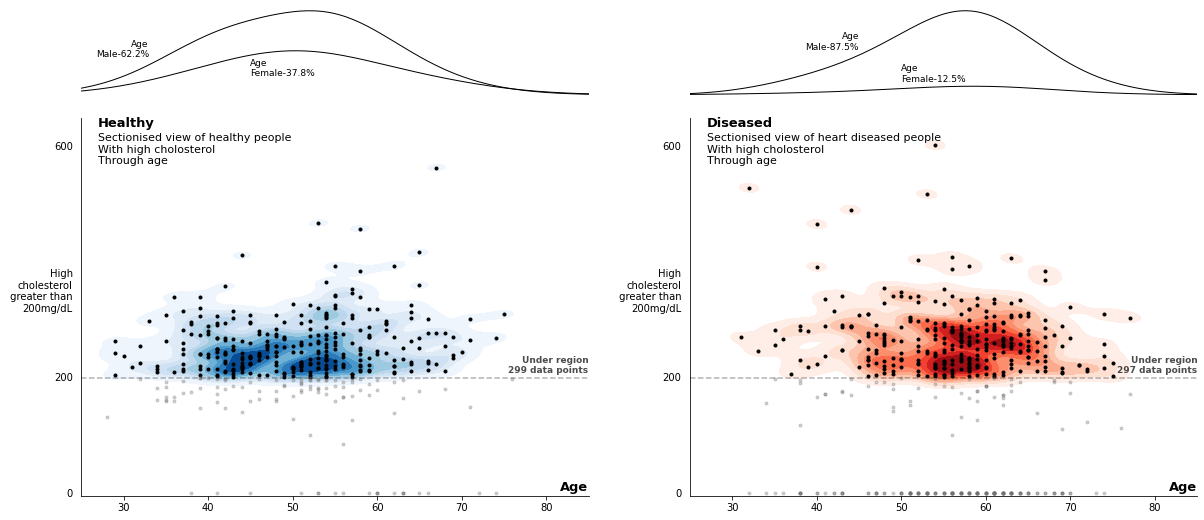

In [2]:
abnormal_cls_healthy_data = healthy_data.loc[healthy_data["Cholesterol"]>200, :]
abnormal_cls_diseased_data = diseased_data.loc[diseased_data["Cholesterol"]>200, :]

normal_cls_healthy_data = healthy_data.loc[healthy_data["Cholesterol"]<=200, :]
normal_cls_diseased_data = diseased_data.loc[diseased_data["Cholesterol"]<=200, :]

male_abnormal_cls_healthy_data = (len(abnormal_cls_healthy_data.loc[abnormal_cls_healthy_data["Sex"]=="M", :])/len(abnormal_cls_healthy_data))*100
female_abnormal_cls_healthy_data = (len(abnormal_cls_healthy_data.loc[abnormal_cls_healthy_data["Sex"]=="F", :])/len(abnormal_cls_healthy_data))*100

male_abnormal_cls_diseased_data = (len(abnormal_cls_diseased_data.loc[abnormal_cls_diseased_data["Sex"]=="M", :])/len(abnormal_cls_diseased_data))*100
female_abnormal_cls_diseased_data = (len(abnormal_cls_diseased_data.loc[abnormal_cls_diseased_data["Sex"]=="F", :])/len(abnormal_cls_diseased_data))*100

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 9), gridspec_kw={'height_ratios': [0.7, 3]})
plt.subplots_adjust(hspace=0.1)

for i in ["top", "right", "left", "bottom"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    
ax1_colors = ["#000", "#000"]
ax2_colors = ["#000", "#000"]
    
sns.kdeplot(healthy_data["Age"], bw_adjust=2, ax=ax1, hue=healthy_data["Sex"], palette=sns.color_palette(ax1_colors), lw=1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim(25, 85)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.text(33, 0.01, "Age\nMale-"+str(round(male_abnormal_cls_healthy_data, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="right")
ax1.text(45, 0.005, "Age\nFemale-"+str(round(female_abnormal_cls_healthy_data, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="left")
ax1.get_legend().remove()


sns.kdeplot(diseased_data["Age"], bw_adjust=2, ax=ax2, hue=diseased_data["Sex"], palette=sns.color_palette(ax2_colors), lw=1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim(25, 85)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.text(45, 0.02, "Age\nMale-"+str(round(male_abnormal_cls_diseased_data, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="right")
ax2.text(50, 0.006, "Age\nFemale-"+str(round(female_abnormal_cls_diseased_data, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="left")
ax2.get_legend().remove()


ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
sns.kdeplot(abnormal_cls_healthy_data["Age"], abnormal_cls_healthy_data["Cholesterol"], cmap="Blues", shade=True, ax=ax3, bw_adjust=.5)
ax3.scatter(abnormal_cls_healthy_data["Age"], abnormal_cls_healthy_data["Cholesterol"], c="#000", marker=".")
ax3.scatter(normal_cls_healthy_data["Age"], normal_cls_healthy_data["Cholesterol"], c="#707070", marker=".", alpha=0.3)
ax3.set_ylim(-5, 650)
ax3.set_xlim(25, 85)
ax3.set_xticks([30, 40, 50, 60, 70, 80])
ax3.set_yticks([])
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.axhline(y=200, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
# ax3.axhline(y=114.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax3.text(24, 350, 'High\ncholesterol\n greater than\n200mg/dL', horizontalalignment='right', verticalalignment='center')
ax3.text(24, 200, '200', horizontalalignment='right', verticalalignment='center')
ax3.text(24, 0, '0', horizontalalignment='right', verticalalignment='center')
ax3.text(24, 600, '600', horizontalalignment='right', verticalalignment='center')
ax3.text(85, 10, "Age", horizontalalignment='right', verticalalignment='center', fontsize=13, fontweight="bold")
ax3.text(85, 205, "Under region\n"+str(len(abnormal_cls_healthy_data))+" data points", horizontalalignment='right', color="#000", alpha=0.7, verticalalignment='bottom', fontsize=9, fontweight=600)
ax3.text(27, 635, "Healthy", fontsize=13, fontweight="bold", horizontalalignment="left")
ax3.text(27, 645, 
"""
Sectionised view of healthy people
With high cholosterol
Through age
""", fontsize=11, fontweight="normal", horizontalalignment="left", verticalalignment="top")


ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
sns.kdeplot(abnormal_cls_diseased_data["Age"], abnormal_cls_diseased_data["Cholesterol"], cmap="Reds", shade=True, ax=ax4, bw_adjust=.5)
ax4.scatter(abnormal_cls_diseased_data["Age"], abnormal_cls_diseased_data["Cholesterol"], c="#000", marker=".")
ax4.scatter(normal_cls_diseased_data["Age"], normal_cls_diseased_data["Cholesterol"], marker=".", c="#707070", alpha=0.3)
ax4.set_ylim(-5, 650)
ax4.set_xlim(25, 85)
ax4.set_xticks([30, 40, 50, 60, 70, 80])
ax4.set_yticks([])
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.axhline(y=200, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
# ax4.axhline(y=114.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax4.text(24, 350, 'High\ncholesterol\n greater than\n200mg/dL', horizontalalignment='right', verticalalignment='center')
ax4.text(24, 200, '200', horizontalalignment='right', verticalalignment='center')
ax4.text(24, 0, '0', horizontalalignment='right', verticalalignment='center')
ax4.text(24, 600, '600', horizontalalignment='right', verticalalignment='center')
ax4.text(85, 10, "Age", horizontalalignment='right', verticalalignment='center', fontsize=13, fontweight="bold")
ax4.text(85, 205, "Under region\n"+str(len(abnormal_cls_diseased_data))+" data points", color="#000", alpha=0.7, horizontalalignment='right', verticalalignment='bottom', fontsize=9, fontweight=600)
ax4.text(27, 635, "Diseased", fontsize=13, fontweight="bold", horizontalalignment="left")
ax4.text(27, 645, 
"""
Sectionised view of heart diseased people
With high cholosterol
Through age
""", fontsize=11, fontweight="normal", horizontalalignment="left", verticalalignment="top")
plt.show();

#### **Findings**
<ul style="list-style-type:square;">
    <li>The <strong>high cholestrol</strong> people are <strong>same</strong> among both healthy and diseased data</li>
    <li>Lots of data are lying on the floor. Either, they are like <strong>no cholestrol people or false data</strong></li>
    <li>There are <strong>62.2% male</strong> and <strong>37.8 female</strong> are healthy among the survey.</li>
    <li><strong>87.5% male</strong> and <strong>12.5 female</strong> are diseased among the survey.</li>
    <li><strong>50-70 age group</strong> people are getting more heart disease than other age groups</li>
</ul>

<hr>

### **Angina**
A condition marked by severe pain in the chest. No one will ever check for CDV if they didn't have pain in the first part. Will type of pain among chest give some useful insights for us to work, Let's see. Most of the angina are induced by some sort of excersice or work (sometimes could be stress). There are much more options for getting angina, we can focus on this itself.

##### **Types of chest pain:**
<ul style="list-style-type:square;">
    <li><strong>TA:</strong> Typical Angina</li>
    <li><strong>ATA:</strong> Atypical Angina</li>
    <li><strong>NAP:</strong> Non Anginal Pain</li>
    <li><strong>ASY:</strong> Asymptomatic</li>
</ul>

The below visualizations are completey reserved for diseased people. Because, even if we consider seeing the healthy people having chest pain, we won't find large insights.

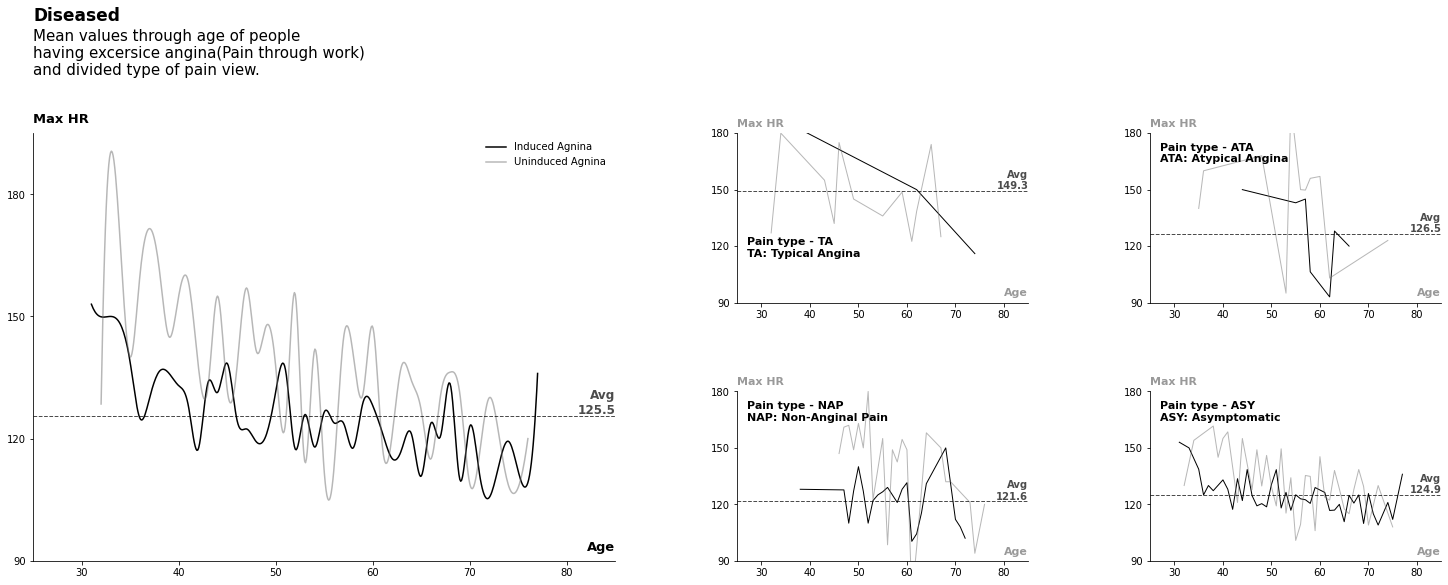

In [3]:
diseased_hr_induced = diseased_data.loc[diseased_data["ExerciseAngina"]=="Y", ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_induced_nm = diseased_data.loc[diseased_data["ExerciseAngina"]=="Y", ["Age", "MaxHR"]]
diseased_hr_not_induced = diseased_data.loc[diseased_data["ExerciseAngina"]=="N", ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_not_induced_nm = diseased_data.loc[diseased_data["ExerciseAngina"]=="N", ["Age", "MaxHR"]]

diseased_hr_induced_cim = interp1d(diseased_hr_induced.index, diseased_hr_induced["MaxHR"], kind = "cubic")
diseased_hr_induced_cim_index = np.linspace(diseased_hr_induced.index.min(), diseased_hr_induced.index.max(), 500)
diseased_hr_induced_cim_maxhr = diseased_hr_induced_cim(diseased_hr_induced_cim_index)

diseased_hr_not_induced_cim = interp1d(diseased_hr_not_induced.index, diseased_hr_not_induced["MaxHR"], kind = "cubic")
diseased_hr_not_induced_cim_index = np.linspace(diseased_hr_not_induced.index.min(), diseased_hr_not_induced.index.max(), 500)
diseased_hr_not_induced_cim_maxhr = diseased_hr_not_induced_cim(diseased_hr_not_induced_cim_index)

diseased_hr_induced_TA = diseased_data.loc[(diseased_data["ExerciseAngina"]=="Y") & (diseased_data["ChestPainType"]=="TA"), ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_induced_ATA = diseased_data.loc[(diseased_data["ExerciseAngina"]=="Y") & (diseased_data["ChestPainType"]=="ATA"), ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_induced_NAP = diseased_data.loc[(diseased_data["ExerciseAngina"]=="Y") & (diseased_data["ChestPainType"]=="NAP"), ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_induced_ASY = diseased_data.loc[(diseased_data["ExerciseAngina"]=="Y") & (diseased_data["ChestPainType"]=="ASY"), ["Age", "MaxHR"]].groupby(by="Age").mean()

diseased_hr_not_induced_TA = diseased_data.loc[(diseased_data["ExerciseAngina"]=="N") & (diseased_data["ChestPainType"]=="TA"), ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_not_induced_ATA = diseased_data.loc[(diseased_data["ExerciseAngina"]=="N") & (diseased_data["ChestPainType"]=="ATA"), ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_not_induced_NAP = diseased_data.loc[(diseased_data["ExerciseAngina"]=="N") & (diseased_data["ChestPainType"]=="NAP"), ["Age", "MaxHR"]].groupby(by="Age").mean()
diseased_hr_not_induced_ASY = diseased_data.loc[(diseased_data["ExerciseAngina"]=="N") & (diseased_data["ChestPainType"]=="ASY"), ["Age", "MaxHR"]].groupby(by="Age").mean()

fig = plt.figure(constrained_layout=True, figsize=(20, 8))

gs = GridSpec(2, 3, figure=fig, width_ratios=[2, 1, 1])
gs.update(wspace = 0.2, hspace = 0.1)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    

line1, = ax1.plot(diseased_hr_induced_cim_index, diseased_hr_induced_cim_maxhr, c="#000", label="Induced Agnina")
line2, = ax1.plot(diseased_hr_not_induced_cim_index, diseased_hr_not_induced_cim_maxhr, c="#707070", alpha=0.5, label="Uninduced Agnina")
ax1.text(85, diseased_hr_induced_cim_maxhr.mean(), "Avg\n"+str(round(diseased_hr_induced_cim_maxhr.mean(), 1)), color="#000", alpha=0.7, horizontalalignment='right', verticalalignment='bottom', fontsize=12, fontweight=600)
ax1.axhline(diseased_hr_induced_cim_maxhr.mean(), lw=1, ls='--', color="#000", alpha=0.7)
ax1.set_xticks([30, 40, 50, 60, 70, 80])
ax1.set_yticks([90, 120, 150, 180])
ax1.set_xlim(25, 85)
ax1.set_ylim(90, 195)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.text(25, 226, "Diseased", fontsize=17, fontweight="bold", horizontalalignment="left", verticalalignment="top")
ax1.text(85, 95, "Age", horizontalalignment='right', verticalalignment='top', fontsize=13, fontweight="bold")
ax1.text(25, 225, 
"""
Mean values through age of people
having excersice angina(Pain through work)
and divided type of pain view.
""", fontsize=15, fontweight="normal", horizontalalignment="left", verticalalignment="top")
ax1.text(25, 200, "Max HR", horizontalalignment='left', verticalalignment='top', fontsize=13, fontweight="bold")
ax1.legend(handles=[line1, line2], edgecolor="#FFF")


ax2.plot(diseased_hr_induced_TA.index, diseased_hr_induced_TA.MaxHR, c="#000", lw=1)
ax2.plot(diseased_hr_not_induced_TA.index, diseased_hr_not_induced_TA.MaxHR, c="#707070", lw=1, alpha=0.5)
ax2.set_xticks([30, 40, 50, 60, 70, 80])
ax2.set_yticks([90, 120, 150, 180])
ax2.set_xlim(25, 85)
ax2.set_ylim(90, 180)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.text(85, diseased_hr_induced_TA.MaxHR.mean(), "Avg\n"+str(round(diseased_hr_induced_TA.MaxHR.mean(), 1)), color="#000", alpha=0.7, horizontalalignment='right', verticalalignment='bottom', fontsize=10, fontweight=600)
ax2.axhline(diseased_hr_induced_TA.MaxHR.mean(), lw=1, ls='--', color="#000", alpha=0.7)
ax2.text(85, 95, "Age", horizontalalignment='right', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax2.text(25, 185, "Max HR", horizontalalignment='left', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax2.text(27, 125, "Pain type - TA\nTA: Typical Angina", horizontalalignment='left', verticalalignment='top', fontsize=11, fontweight="bold")

ax3.plot(diseased_hr_induced_ATA.index, diseased_hr_induced_ATA.MaxHR, c="#000", lw=1)
ax3.plot(diseased_hr_not_induced_ATA.index, diseased_hr_not_induced_ATA.MaxHR, c="#707070", lw=1, alpha=0.5)
ax3.set_xticks([30, 40, 50, 60, 70, 80])
ax3.set_yticks([90, 120, 150, 180])
ax3.set_xlim(25, 85)
ax3.set_ylim(90, 180)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.text(85, diseased_hr_induced_ATA.MaxHR.mean(), "Avg\n"+str(round(diseased_hr_induced_ATA.MaxHR.mean(), 1)), color="#000", alpha=0.7, horizontalalignment='right', verticalalignment='bottom', fontsize=10, fontweight=600)
ax3.axhline(diseased_hr_induced_ATA.MaxHR.mean(), lw=1, ls='--', color="#000", alpha=0.7)
ax3.text(85, 95, "Age", horizontalalignment='right', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax3.text(25, 185, "Max HR", horizontalalignment='left', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax3.text(27, 175, "Pain type - ATA\nATA: Atypical Angina", horizontalalignment='left', verticalalignment='top', fontsize=11, fontweight="bold")

ax4.plot(diseased_hr_induced_NAP.index, diseased_hr_induced_NAP.MaxHR, c="#000", lw=1)
ax4.plot(diseased_hr_not_induced_NAP.index, diseased_hr_not_induced_NAP.MaxHR, c="#707070", lw=1, alpha=0.5)
ax4.set_xticks([30, 40, 50, 60, 70, 80])
ax4.set_yticks([90, 120, 150, 180])
ax4.set_xlim(25, 85)
ax4.set_ylim(90, 180)
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.text(85, diseased_hr_induced_NAP.MaxHR.mean(), "Avg\n"+str(round(diseased_hr_induced_NAP.MaxHR.mean(), 1)), color="#000", alpha=0.7, horizontalalignment='right', verticalalignment='bottom', fontsize=10, fontweight=600)
ax4.axhline(diseased_hr_induced_NAP.MaxHR.mean(), lw=1, ls='--', color="#000", alpha=0.7)
ax4.text(85, 95, "Age", horizontalalignment='right', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax4.text(25, 185, "Max HR", horizontalalignment='left', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax4.text(27, 175, "Pain type - NAP\nNAP: Non-Anginal Pain", horizontalalignment='left', verticalalignment='top', fontsize=11, fontweight="bold")

ax5.plot(diseased_hr_induced_ASY.index, diseased_hr_induced_ASY.MaxHR, c="#000", lw=1)
ax5.plot(diseased_hr_not_induced_ASY.index, diseased_hr_not_induced_ASY.MaxHR, c="#707070", lw=1, alpha=0.5)
ax5.set_xticks([30, 40, 50, 60, 70, 80])
ax5.set_yticks([90, 120, 150, 180])
ax5.set_xlim(25, 85)
ax5.set_ylim(90, 180)
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.text(85, diseased_hr_induced_ASY.MaxHR.mean(), "Avg\n"+str(round(diseased_hr_induced_ASY.MaxHR.mean(), 1)), color="#000", alpha=0.7, horizontalalignment='right', verticalalignment='bottom', fontsize=10, fontweight=600)
ax5.axhline(diseased_hr_induced_ASY.MaxHR.mean(), lw=1, ls='--', color="#000", alpha=0.7)
ax5.text(85, 95, "Age", horizontalalignment='right', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax5.text(25, 185, "Max HR", horizontalalignment='left', verticalalignment='center', fontsize=11, fontweight="bold", alpha=0.4)
ax5.text(27, 175, "Pain type - ASY\nASY: Asymptomatic", horizontalalignment='left', verticalalignment='top', fontsize=11, fontweight="bold")

plt.show();

#### **Findings**
<ul style="list-style-type:square;">
    <li>Induced angina is caused <strong>more on the youngsters</strong> around the age group 30</li>
    <li>Asymptomatic pain is the <strong>highly occuring</strong> amony all age group</li>
    <li>Typical angina is <strong>lowest</strong> among them all. Low data to be characterised</li>
    <li>People around the <strong>age 40-70</strong> are getting ATA as the pain type</li>
    <li><strong>Non-Anginal pain</strong> is mostly experienced by <strong>oldest(age > 70)</strong></li>
</ul>

<hr>

### **Resting ECG**
Electro CardioGram results are not hard to take and even not a painful process. But, can give a large insights of the patient. Here we are going to relate the major factor BP with the ECG results and their gender distribution.

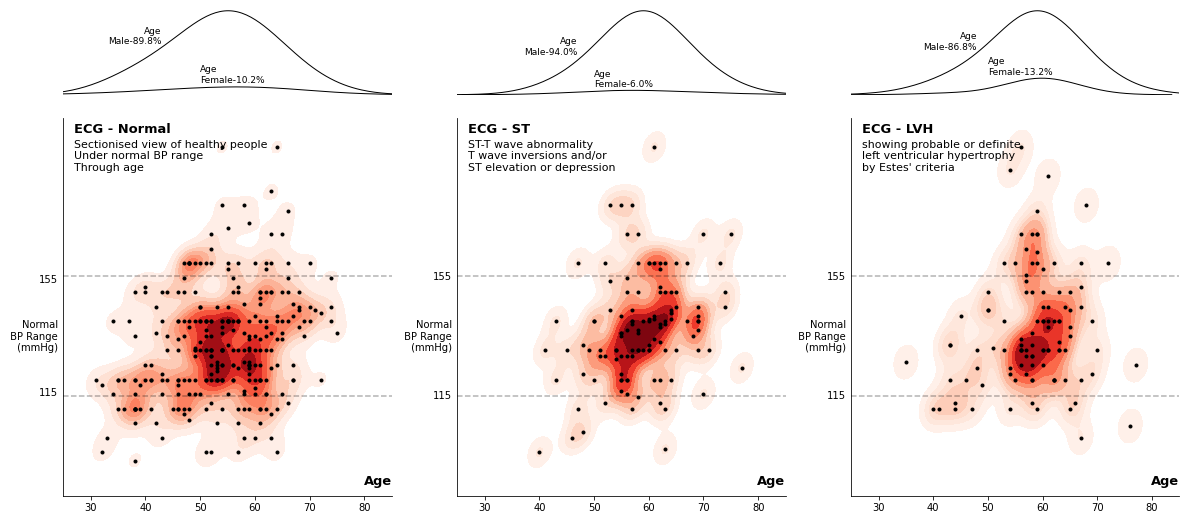

In [4]:
resting_ecg_normal_bp = diseased_data.loc[diseased_data["RestingECG"]=="Normal", :]
resting_ecg_st_bp = diseased_data.loc[diseased_data["RestingECG"]=="ST", :]
resting_ecg_lvh_bp = diseased_data.loc[diseased_data["RestingECG"]=="LVH", :]

male_resting_ecg_normal_bp = (len(resting_ecg_normal_bp.loc[resting_ecg_normal_bp["Sex"]=="M", :])/len(resting_ecg_normal_bp))*100
female_resting_ecg_normal_bp = (len(resting_ecg_normal_bp.loc[resting_ecg_normal_bp["Sex"]=="F", :])/len(resting_ecg_normal_bp))*100

male_resting_ecg_st_bp = (len(resting_ecg_st_bp.loc[resting_ecg_st_bp["Sex"]=="M", :])/len(resting_ecg_st_bp))*100
female_resting_ecg_st_bp = (len(resting_ecg_st_bp.loc[resting_ecg_st_bp["Sex"]=="F", :])/len(resting_ecg_st_bp))*100

male_resting_ecg_lvh_bp = (len(resting_ecg_lvh_bp.loc[resting_ecg_lvh_bp["Sex"]=="M", :])/len(resting_ecg_lvh_bp))*100
female_resting_ecg_lvh_bp = (len(resting_ecg_lvh_bp.loc[resting_ecg_lvh_bp["Sex"]=="F", :])/len(resting_ecg_lvh_bp))*100

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 9), gridspec_kw={'height_ratios': [0.7, 3]})
plt.subplots_adjust(hspace=0.1)
for i in ["top", "right", "left", "bottom"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    
sns.kdeplot(resting_ecg_normal_bp["Age"], bw_adjust=2, ax=ax1, hue=resting_ecg_normal_bp["Sex"], palette=sns.color_palette(ax1_colors), lw=1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim(25, 85)
ax1.set_xlabel("")
ax1.set_ylabel("")
# ax1.text(25, 0.01, "Age", fontsize=9, fontweight="normal", horizontalalignment="left")
ax1.text(43, 0.02, "Age\nMale-"+str(round(male_resting_ecg_normal_bp, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="right")
ax1.text(50, 0.005, "Age\nFemale-"+str(round(female_resting_ecg_normal_bp, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="left")
ax1.get_legend().remove()

sns.kdeplot(resting_ecg_st_bp["Age"], bw_adjust=2, ax=ax2, hue=resting_ecg_st_bp["Sex"], palette=sns.color_palette(ax1_colors), lw=1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim(25, 85)
ax2.set_xlabel("")
ax2.set_ylabel("")
# ax2.text(25, 0.01, "Age", fontsize=9, fontweight="normal", horizontalalignment="left")
ax2.text(47, 0.02, "Age\nMale-"+str(round(male_resting_ecg_st_bp, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="right")
ax2.text(50, 0.004, "Age\nFemale-"+str(round(female_resting_ecg_st_bp, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="left")
ax2.get_legend().remove()


sns.kdeplot(resting_ecg_lvh_bp["Age"], bw_adjust=2, ax=ax3, hue=resting_ecg_lvh_bp["Sex"], palette=sns.color_palette(ax1_colors), lw=1)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim(25, 85)
ax3.set_xlabel("")
ax3.set_ylabel("")
# ax3.text(25, 0.01, "Age", fontsize=9, fontweight="normal", horizontalalignment="left")
ax3.text(48, 0.02, "Age\nMale-"+str(round(male_resting_ecg_lvh_bp, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="right")
ax3.text(50, 0.009, "Age\nFemale-"+str(round(female_resting_ecg_lvh_bp, 1))+"%", fontsize=9, fontweight="normal", horizontalalignment="left")
ax3.get_legend().remove()

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
# ax4.scatter(abnormal_bp_healthy_data["Age"], abnormal_bp_healthy_data["RestingBP"], c="#707070", marker=".", alpha=0.5)
sns.kdeplot(resting_ecg_normal_bp["Age"], resting_ecg_normal_bp["RestingBP"], cmap="Reds", bw_adjust=0.5, shade=True, ax=ax4)
ax4.scatter(resting_ecg_normal_bp["Age"], resting_ecg_normal_bp["RestingBP"], c="#000", marker=".")
ax4.set_ylim(80, 210)
ax4.set_xlim(25, 85)
ax4.set_xticks([30, 40, 50, 60, 70, 80])
ax4.set_yticks([])
ax4.set_xlabel("")
ax4.set_ylabel("")
ax4.axhline(y=155.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax4.axhline(y=114.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax4.text(24, 135, 'Normal\n BP Range\n (mmHg)', horizontalalignment='right', verticalalignment='center')
ax4.text(24, 115.5, '115', horizontalalignment='right', verticalalignment='center')
ax4.text(24, 154.5, '155', horizontalalignment='right', verticalalignment='center')
ax4.text(85, 85, "Age", horizontalalignment='right', verticalalignment='center', fontsize=13, fontweight="bold")
ax4.text(27, 205, "ECG - Normal", fontsize=13, fontweight="bold", horizontalalignment="left")
ax4.text(27, 188, 
"""
Sectionised view of healthy people
Under normal BP range
Through age
""", fontsize=11, fontweight="normal", horizontalalignment="left")

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
# ax5.scatter(abnormal_bp_diseased_data["Age"], abnormal_bp_diseased_data["RestingBP"], c="#707070", marker=".", alpha=0.5)
sns.kdeplot(resting_ecg_st_bp["Age"], resting_ecg_st_bp["RestingBP"], cmap="Reds", bw_adjust=0.5, ax=ax5, shade=True)
ax5.scatter(resting_ecg_st_bp["Age"], resting_ecg_st_bp["RestingBP"], c="#000", marker=".")
ax5.set_ylim(80, 210)
ax5.set_xlim(25, 85)
ax5.set_xticks([30, 40, 50, 60, 70, 80])
ax5.set_yticks([])
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.axhline(y=155.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax5.axhline(y=114.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax5.text(24, 135, 'Normal\n BP Range\n (mmHg)', horizontalalignment='right', verticalalignment='center')
ax5.text(24, 114.5, '115', horizontalalignment='right', verticalalignment='center')
ax5.text(24, 155.5, '155', horizontalalignment='right', verticalalignment='center')
ax5.text(85, 85, "Age", horizontalalignment='right', verticalalignment='center', fontsize=13, fontweight="bold")
ax5.text(27, 205, "ECG - ST", fontsize=13, fontweight="bold", horizontalalignment="left")
ax5.text(27, 188, 
"""
ST-T wave abnormality\nT wave inversions and/or\nST elevation or depression
""", fontsize=11, fontweight="normal", horizontalalignment="left")

ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
# ax5.scatter(abnormal_bp_diseased_data["Age"], abnormal_bp_diseased_data["RestingBP"], c="#707070", marker=".", alpha=0.5)
sns.kdeplot(x=resting_ecg_lvh_bp["Age"], y=resting_ecg_lvh_bp["RestingBP"], cmap="Reds", shade=True, bw_adjust=.5, ax=ax6)
ax6.scatter(resting_ecg_lvh_bp["Age"], resting_ecg_lvh_bp["RestingBP"], c="#000", marker=".")
ax6.set_ylim(80, 210)
ax6.set_xlim(25, 85)
ax6.set_xticks([30, 40, 50, 60, 70, 80])
ax6.set_yticks([])
ax6.set_xlabel("")
ax6.set_ylabel("")
ax6.axhline(y=155.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax6.axhline(y=114.5, xmin=0.0, xmax=1.0, color='k', linestyle='--', alpha=0.3)
ax6.text(24, 135, 'Normal\n BP Range\n (mmHg)', horizontalalignment='right', verticalalignment='center')
ax6.text(24, 114.5, '115', horizontalalignment='right', verticalalignment='center')
ax6.text(24, 155.5, '155', horizontalalignment='right', verticalalignment='center')
ax6.text(85, 85, "Age", horizontalalignment='right', verticalalignment='center', fontsize=13, fontweight="bold")
ax6.text(27, 205, "ECG - LVH", fontsize=13, fontweight="bold", horizontalalignment="left")
ax6.text(27, 188, 
"""
showing probable or definite\nleft ventricular hypertrophy\nby Estes' criteria
""", fontsize=11, fontweight="normal", horizontalalignment="left")
plt.show();

#### **Findings**
<ul style="list-style-type:square;">
    <li>Not all of the diseased people are having ECG variance. Majority of the ECGs are showing normal</li>
    <li>Gender bias is not what we could expect here. Maybe this could be the false data problem</li>
    <li>ECG showing ST waves for people of 50-70 age group are diseased</li>
    <li>All among the ECG the age group is being common to extents of 50-70</li>
    <li>The age group of healthy people under normal BP Range is <strong>40-60</strong></li>
    <li>High rate of people who are diagonised for heart disease are having normal BP range and normal ECG waves</li>
</ul>

<hr>

## **Conclusion**
Thank you for bearing with me all the time. Hope, this notebook would be useful for people who are trying to predict the heart failure. This could really help in getting things straight and working one by one.

You could also use this analyzation for getting rid of outliers. Let me know how I can update this notebook for better purpose.